In [1]:
# Simglucose Imports
from simglucose.controller.basal_bolus_ctrller import BBController
from simglucose.sensor.cgm import CGMSensor
from simglucose.actuator.pump import InsulinPump
from simglucose.patient.t1dpatient import T1DPatient
from simglucose.simulation.scenario_gen import RandomScenario
from simglucose.simulation.scenario import CustomScenario
from simglucose.simulation.sim_engine import SimObj, sim, batch_sim
from simglucose.controller.base import Controller, Action

# Custom imports
from custom import *
from core import config
from gymenv import T1DSimEnv
from core import drl

# Others
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
import pickle
import gym
from gym.envs.registration import register

In [2]:
def make_env():
    register(
    id='simglucose-adolescent2-v0',
    entry_point='gymenv:T1DSimEnv',
    kwargs={'patient_name': 'adolescent#002',
            'reward_fun': reward_fun,
            'done_fun': done_fun,
            'scenario_seed': 5}
    )
    env = gym.make('simglucose-adolescent2-v0')
    return env

In [3]:
load_name = 'results/adult_2_seed_5.p'
load_file = pickle.load(open(load_name, 'rb'))
env = make_env()

In [5]:
Config = config.config(env)
C51 = drl.C51(Config, ifCVaR=False, p=load_file["p"])

P loaded for c51


-25.022549967742567


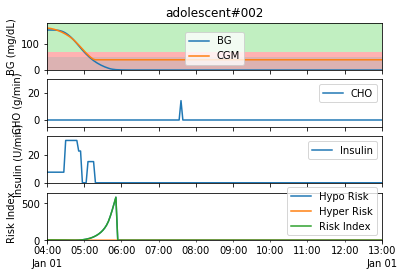

In [8]:
terminal = False
step = 0
episode_return = []
observation = Config.process(env.reset(), meal=0)

while step <= Config.max_step:
    values = C51.Q(observation)
    action_id = np.random.choice(np.flatnonzero(values == values.max()))
    action = get_action(action_id, Config.action_map)

    next_observation, reward, terminal, info = env.step(action)
    next_observation = Config.process(next_observation, meal=info['meal'])

    observation = next_observation
    step += 1
    episode_return.append(reward)
print(discounted_return(episode_return, Config.gamma))
env.render()

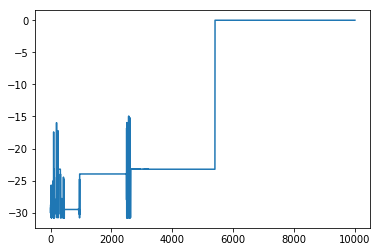

In [9]:
plt.plot(load_file['returns'])